In [97]:
# 🌸 Naive Bayes Example: Classifying Iris Species Using Multiple Features

# ---------------------------------------------------------
# 🛠 Step 1: Import all required libraries
# ---------------------------------------------------------

# numpy: used for numerical operations on arrays
import numpy as np

# pandas: used to structure and manipulate datasets (optional here but good to have)
import pandas as pd

# matplotlib.pyplot: used for plotting graphs
import matplotlib.pyplot as plt

# sklearn.datasets: contains the famous Iris dataset
from sklearn.datasets import load_iris

# sklearn.model_selection: used to split data into train/test sets
from sklearn.model_selection import train_test_split

# sklearn.metrics: used to evaluate the model's predictions
from sklearn.metrics import classification_report, confusion_matrix

# 👇 This is our custom-built model wrapper class (built using GaussianNB)
from naive_bayes import NaiveBayesModel



In [98]:

# ---------------------------------------------------------
# 🌼 Step 2: Load the Iris dataset
# ---------------------------------------------------------

# ❓ Why Iris?
# - Small, easy to visualize, and contains 3 distinct flower species:
#   Setosa, Versicolor, Virginica
# - Each sample has 4 features:
#   - sepal length
#   - sepal width
#   - petal length
#   - petal width

# `load_iris()` returns a dictionary-like object
iris = load_iris()

# X will hold the feature values (sepal/petal measurements)
X = iris.data  # shape = (150 samples, 4 features)

# y holds the target labels (0, 1, or 2 → each class/species)
y = iris.target  # shape = (150,)

# Let's peek at the feature names
print("🔎 Feature names:", iris.feature_names)

# Show the first 5 samples (rows of features)
print("📊 First 5 samples of X:\n", X[:5])

# Show the corresponding labels
print("Labels (target classes):", np.unique(y))  # → [0, 1, 2]



🔎 Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
📊 First 5 samples of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels (target classes): [0 1 2]


In [99]:
# ---------------------------------------------------------
# ✂️ Step 3: Split the dataset into training and test sets
# ---------------------------------------------------------

# ❓ Why split the data?
# - So we can train on one portion and test on unseen data.

# train_test_split returns 4 arrays:
# - X_train: training feature data
# - X_test: testing feature data
# - y_train: training labels
# - y_test: testing labels

# test_size = 0.2 → 20% of data used for testing (30 samples out of 150)
# random_state = 42 → ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [100]:
# ---------------------------------------------------------
# 🏋️ Step 4: Train the Naive Bayes classifier
# ---------------------------------------------------------

# Create an instance of our model
model = NaiveBayesModel()

# So your “model” is just:
    # A table of μ (mean) and σ² (variance) per feature per class
    # A list of class probabilities

# Call the train method with training data
# Internally, it uses GaussianNB().fit(X, y)
model.train(X_train, y_train)


In [101]:

# ---------------------------------------------------------
# 🧠 Step 5: Make predictions
# ---------------------------------------------------------

# Predict classes for test samples
# 🔍 For each test flower:
# - Use Gaussian formula to compute likelihood of each feature value under each class
# - Multiply all feature likelihoods for a class
# - Pick class with highest final probability
y_pred = model.predict(X_test)


# y_pred is a NumPy array with predicted class labels
print("🔮 Predictions:\n", y_pred)



🔮 Predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [ ]:
# ---------------------------------------------------------
# ✅ Step 6: Evaluate the model
# ---------------------------------------------------------

# Show confusion matrix: compares actual vs predicted classes
# Confusion Matrix 📉
# Use Confusion Matrix to spot specific misclassifications
# What: A table showing actual vs predicted class counts
# Why: Helps you see where your model is getting confused
# Details:
# Rows = Actual classes
# Columns = Predicted classes
# Example: If many Setosa flowers are misclassified as Versicolor, you’ll see it here as off-diagonal counts.

conf_matrix = confusion_matrix(y_test, y_pred)
print("📉 Confusion Matrix (rows are actual classes, columns are predicted classes):")

# Header row with spacing
print(f"{'':15}", end="")  # empty space for corner
for label in iris.target_names:
    print(f"{label:15}", end="")
print()

# Rows with actual class labels and values
for i, actual_class in enumerate(iris.target_names):
    print(f"{actual_class:15}", end="")
    for val in conf_matrix[i]:
        print(f"{val:<15}", end="")
    print()



# Show classification metrics (precision, recall, F1-score)
# Classification Report 📝
# Use Classification Report to dig into precision/recall tradeoffs per class
# What: Summary of key metrics for each class
# Why: Gives detailed insight beyond just accuracy
# Details:
# Precision: Of all predicted as class X, how many really are class X? (focus on false positives)
# Recall: Of all actual class X, how many did we correctly predict? (focus on false negatives)
# F1-score: Harmonic mean of precision and recall — good balanced metric when classes are uneven
# Why important: Helps understand model strengths/weaknesses on each class separately

report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\n📝 Classification Report:\n", report)

# Show accuracy (correct predictions / total predictions)
accuracy = model.accuracy(X_test, y_test)
print(f"✅ Accuracy Score: {accuracy:.2f}")



📉 Confusion Matrix (rows are actual, columns are predictions):
               setosa         versicolor     virginica      
setosa         19             0              0              
versicolor     0              12             1              
virginica      0              0              13             

📝 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

✅ Accuracy Score: 0.98


C:\Users\Logan\AppData\Local\Temp\ipykernel_10968\1825703126.py:46: UserWarning: Glyph 127804 (\N{BLOSSOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127804 (\N{BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


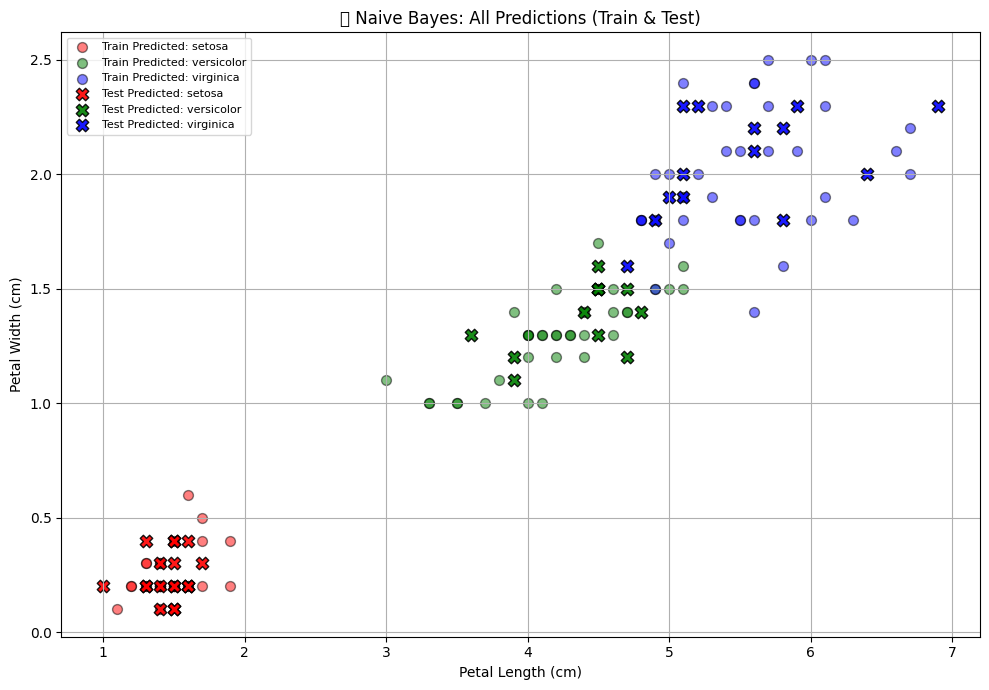

In [103]:
# ---------------------------------------------------------
# 🔮 Step 7: Visualize ALL Predictions (Train + Test)
# ---------------------------------------------------------

plt.figure(figsize=(10, 7))

# First, predict on all training data
y_train_pred = model.predict(X_train)

# Define color map for 3 classes
colors = ['red', 'green', 'blue']
labels = iris.target_names

# 🔵 Plot training data (use circles)
for i, label in enumerate(labels):
    plt.scatter(
        X_train[y_train_pred == i, 2],  # Petal length
        X_train[y_train_pred == i, 3],  # Petal width
        color=colors[i],
        label=f"Train Predicted: {label}",
        alpha=0.5,
        edgecolor='k',
        marker='o',
        s=50
    )

# 🔴 Plot test data (use X markers for distinction)
for i, label in enumerate(labels):
    plt.scatter(
        X_test[y_pred == i, 2],  # Petal length
        X_test[y_pred == i, 3],  # Petal width
        color=colors[i],
        label=f"Test Predicted: {label}",
        alpha=0.9,
        edgecolor='k',
        marker='X',
        s=80
    )

# Axis labels and title
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("🌼 Naive Bayes: All Predictions (Train & Test)")
plt.legend(loc="upper left", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()
